# **TD noté**

**Importation des bibliothèques**

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mapping import *
import math
plt.style.use('fivethirtyeight')

# **I-Importation des datasets**

In [67]:
regularities = pd.read_csv("C:\\Users\\yassi\\OneDrive - De Vinci\\ESILV\\A4\\Semestre 07\\Python for Data analysis\\TD\\TD6\\Regularities_by_liaisons_Trains_France.csv")
travel = pd.read_csv("C:\\Users\\yassi\\OneDrive - De Vinci\\ESILV\\A4\\Semestre 07\\Python for Data analysis\\TD\\TD6\\Travel_titles_validations_in_Paris_and_suburbs.csv")

In [3]:
regularities

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),...,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,...,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,...,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,...,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,...,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,...,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7801,2020,5.0,PARIS LYON,AVIGNON TGV,162.702381,191.0,23.0,50.0,5.359667,1.201190,...,46.264583,4.0,1.0,2020-05,27.272727,18.181818,9.090909,36.363636,9.090909,0.000000
7802,2020,5.0,PARIS LYON,MARSEILLE ST CHARLES,197.241206,227.0,28.0,54.0,5.702160,1.125963,...,49.050000,6.0,1.0,2020-05,30.000000,30.000000,10.000000,30.000000,0.000000,0.000000
7803,2020,5.0,PARIS LYON,NIMES,182.094828,129.0,13.0,20.0,2.996667,0.040517,...,48.305556,1.0,1.0,2020-05,20.000000,80.000000,0.000000,0.000000,0.000000,0.000000
7804,2020,5.0,PARIS LYON,SAINT ETIENNE CHATEAUCREUX,NaN,NaN,4.0,0.0,0.000000,NaN,...,NaN,NaN,NaN,2020-05,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
regularities.columns

Index(['Year', 'Month', 'Departure station', 'Arrival station',
       'Average travel time (min)', 'Number of expected circulations',
       'Number of cancelled trains', 'Number of late trains at departure',
       'Average delay of late departing trains (min)',
       'Average delay of all departing trains (min)',
       'Comment (optional) delays at departure',
       'Number of trains late on arrival',
       'Average delay of late arriving trains (min)',
       'Average delay of all arriving trains (min)',
       'Comment (optional) delays on arrival',
       '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
       '% trains late due to railway infrastructure (maintenance, works)',
       '% trains late due to traffic management (rail line traffic, network interactions)',
       '% trains late due to rolling stock',
       '% trains late due to station management and reuse of material',
       '% trains late due

# **II-Nettoyage**

**Suppression des colonnes non pertinentes**

In [68]:
del regularities['Comment (optional) delays at departure']
del regularities['Comment (optional) delays on arrival']
del regularities['Average train delay > 15min']

**Suppression des lignes présentants des données manquantes**

In [69]:
regularities = regularities.dropna(axis=0)

**Modification des noms de colonnes**

In [147]:
regularities = regularities.rename(columns={'Departure station' : 'departure_station',
                                            'Arrival station' : 'arrival_station',
                                            'Average travel time (min)' : 'average_travel_time',
                                            'Number of expected circulations' : 'expected_circulation',
                                            'Number of cancelled trains' : 'number_cancelled_trains',
                                            'Number of late trains at departure' : 'number_late_trains_departure',
                                            'Average delay of late departing trains (min)' : 'average_delay_late_departing_trains',
                                            'Average delay of all departing trains (min)' : 'average_delay_all_departing_trains',
                                            'Number of trains late on arrival' : 'number_late_trains_arrival',
                                            'Average delay of late arriving trains (min)' : 'average_delay_late_arriving_trains',
                                            'Average delay of all arriving trains (min)' : 'average_delay_all_arriving_trains',
                                            '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)' : '%_trains_late_external_causes',
                                            '% trains late due to railway infrastructure (maintenance, works)' : '%_trains_late_railway_infrastructure',
                                            '% trains late due to traffic management (rail line traffic, network interactions)' : '%_trains_late_traffic_management',
                                            '% trains late due to rolling stock' : '%_trains_late_rolling_stock',
                                            '% trains late due to station management and reuse of material' : '% trains_late_station_management',
                                            '% trains late due to passenger traffic (affluence, PSH management, connections)' : '%_trains_late_passenger_traffic',
                                            'Number of late trains > 15min' : 'number_late_trains_15min',
                                            'Number of late trains > 30min' : 'number_late_trains_30min',
                                            'Number of late trains > 60min' : 'number_late_trains_60min',
                                            'Delay due to external causes' : 'delay_external_causes',
                                            'Delay due to railway infrastructure' : 'delay_railway_infrastructure',
                                            'Delay due to traffic management' : 'delay_traffic_management',
                                            'Delay due to rolling stock' : 'delay_rolling_stock',
                                            'Delay due to station management and reuse of material' : 'delay_station_management',
                                            'Delay due to travellers taken into account' : 'delay_passenger_traffic'
                                           })

**Arrondir le temps de trajet moyen**

In [71]:
regularities['average_travel_time'] = round(regularities['average_travel_time'],-1)

**Ajout du nombre total de retards**

In [226]:
regularities.insert(loc=7, column='number_late_trains', value=regularities['number_late_trains_departure'] + regularities['number_late_trains_arrival'])

**Dataframe hors Covid**

In [228]:
L=[]
for k in range(regularities.shape[0]):
    if(regularities.iloc[k].Year!=2020):
        L.append(k)
LFinale=[]
for k in range(len(L)):
    LFinale.append(regularities.iloc[L[k]])
regularities_hc=pd.DataFrame(LFinale)
regularities_hc

,Year,Month,departure_station,arrival_station,average_travel_time,expected_circulation,number_cancelled_trains,number_late_trains,number_late_trains_departure,average_delay_late_departing_trains,...,number_late_trains_15min,number_late_trains_30min,number_late_trains_60min,Period,delay_external_causes,delay_railway_infrastructure,delay_traffic_management,delay_rolling_stock,delay_station_management,delay_passenger_traffic
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,130.0,247.0,0.0,232.0,191.0,3.576353,...,21.0,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,180.0,242.0,0.0,225.0,178.0,9.780805,...,35.0,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,60.0,435.0,5.0,482.0,391.0,3.896974,...,30.0,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,170.0,114.0,0.0,116.0,101.0,1.950990,...,8.0,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,70.0,404.0,4.0,357.0,284.0,8.379108,...,28.0,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,2019,12.0,FRANCFORT,PARIS EST,200.0,74.0,9.0,64.0,51.0,7.533660,...,18.0,10.0,2.0,2019-12,23.076923,23.076923,38.461538,7.692308,7.692308,0.000000
7556,2019,12.0,STUTTGART,PARIS EST,160.0,83.0,7.0,95.0,74.0,7.584234,...,18.0,11.0,2.0,2019-12,10.000000,10.000000,55.000000,10.000000,15.000000,0.000000
7557,2019,12.0,ITALIE,PARIS LYON,420.0,39.0,4.0,36.0,29.0,5.843103,...,7.0,4.0,2.0,2019-12,14.285714,14.285714,57.142857,14.285714,0.000000,0.000000
7558,2019,12.0,MARSEILLE ST CHARLES,MADRID,220.0,9.0,1.0,4.0,3.0,0.933333,...,1.0,0.0,0.0,2019-12,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000


**Dataframe période COVID**

In [229]:
L=[]
for k in range(regularities.shape[0]):
    if(regularities.iloc[k].Year==2020 and regularities.iloc[k].Month >=2):
        L.append(k)
LFinale=[]
for k in range(len(L)):
    LFinale.append(regularities.iloc[L[k]])
regularities_c=pd.DataFrame(LFinale)
regularities_c

,Year,Month,departure_station,arrival_station,average_travel_time,expected_circulation,number_cancelled_trains,number_late_trains,number_late_trains_departure,average_delay_late_departing_trains,...,number_late_trains_15min,number_late_trains_30min,number_late_trains_60min,Period,delay_external_causes,delay_railway_infrastructure,delay_traffic_management,delay_rolling_stock,delay_station_management,delay_passenger_traffic
6994,2020,2.0,BREST,PARIS MONTPARNASSE,230.0,256.0,4.0,179.0,159.0,3.038679,...,20.0,10.0,5.0,2020-02,55.000000,20.000000,20.000000,5.000000,0.000000,0.000000
6995,2020,2.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,170.0,201.0,0.0,150.0,142.0,2.566667,...,6.0,5.0,1.0,2020-02,37.500000,12.500000,25.000000,12.500000,0.000000,12.500000
6996,2020,2.0,PARIS MONTPARNASSE,LE MANS,60.0,443.0,4.0,381.0,331.0,4.482578,...,17.0,10.0,4.0,2020-02,15.217391,21.739130,39.130435,21.739130,2.173913,0.000000
6997,2020,2.0,LE MANS,PARIS MONTPARNASSE,60.0,400.0,5.0,404.0,323.0,5.075284,...,30.0,16.0,8.0,2020-02,25.373134,23.880597,25.373134,13.432836,5.970149,5.970149
6998,2020,2.0,PARIS MONTPARNASSE,POITIERS,90.0,480.0,4.0,362.0,315.0,2.215291,...,19.0,9.0,2.0,2020-02,24.444444,24.444444,42.222222,4.444444,4.444444,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,2020,5.0,AIX EN PROVENCE TGV,PARIS LYON,190.0,166.0,17.0,134.0,128.0,2.875781,...,6.0,3.0,0.0,2020-05,50.000000,16.666667,16.666667,0.000000,16.666667,0.000000
7801,2020,5.0,PARIS LYON,AVIGNON TGV,160.0,191.0,23.0,61.0,50.0,5.359667,...,8.0,4.0,1.0,2020-05,27.272727,18.181818,9.090909,36.363636,9.090909,0.000000
7802,2020,5.0,PARIS LYON,MARSEILLE ST CHARLES,200.0,227.0,28.0,64.0,54.0,5.702160,...,10.0,6.0,1.0,2020-05,30.000000,30.000000,10.000000,30.000000,0.000000,0.000000
7803,2020,5.0,PARIS LYON,NIMES,180.0,129.0,13.0,25.0,20.0,2.996667,...,3.0,1.0,1.0,2020-05,20.000000,80.000000,0.000000,0.000000,0.000000,0.000000


# **III-Analyse**

In [10]:
##analyse globale
#les mois les plus chargés
#périodes avec le plus grand nombre de retards
#retard max par mois
#comparaisons du nombre de gros retards et de petits retards
#raison principales des retards
#retard en fonction de la durée du trajet
#nombre de retard au départ vs nombre de retard à l'arrivée


##covid
#impact du covid sur la circulation
#impact du covid sur le nombre de retard
#impact du covid sur la durée des retards
#sur le nombre de train annulés


##grève
#impact des grèves sur la circulation
#impact des grèves sur le nombre de retard
#impact des grèves sur la durée des retards
#retard moyen en période de grève (voir période sur internet)

## **1- Analyse globale**

**Les mois les plus chargés**

<AxesSubplot:title={'center':'Circulation ferroviaire en fonction du mois'}, xlabel='Mois', ylabel='Nombre de train'>

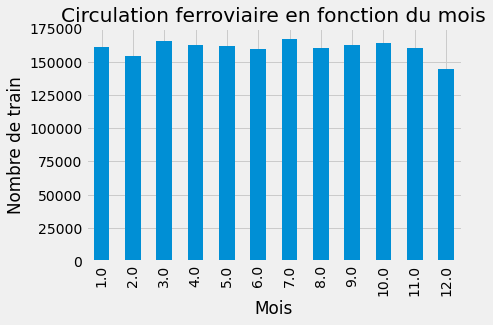

In [127]:
month = regularities_hc.groupby('Month')['expected_circulation'].sum()
month.plot.bar(title = "Circulation ferroviaire en fonction du mois", xlabel='Mois', ylabel='Nombre de train')

**Mois avec le plus de retards**

<AxesSubplot:title={'center':'Nombre de retards en fonction du mois'}, xlabel='Mois', ylabel='Nombre de retard'>

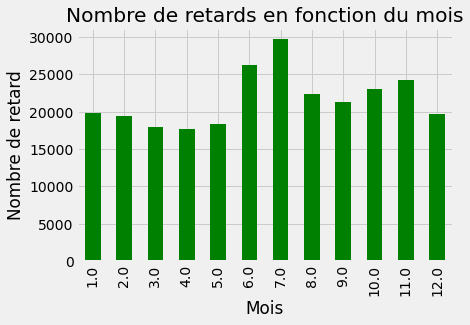

In [128]:
delaypermonth = regularities_hc.groupby('Month')['number_late_trains_arrival'].sum()
delaypermonth.plot.bar(title = "Nombre de retards en fonction du mois", color='green', xlabel='Mois', ylabel='Nombre de retard')

**Retard moyen par mois**

<AxesSubplot:title={'center':'Retard moyen par mois'}, xlabel='Mois', ylabel='Retard (min)'>

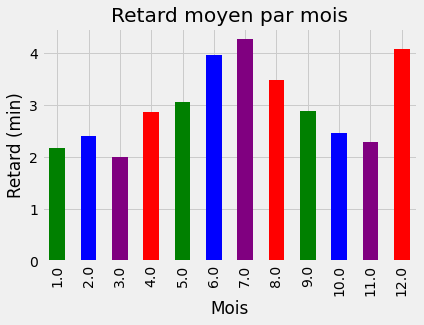

In [210]:
RetardMoy_M=regularities_hc.groupby(['Month'])
RetardMoy_M.mean()["average_delay_all_departing_trains"].plot.bar(title='Retard moyen par mois',
                                                                  color=['green', 'blue', 'purple', 'red'],
                                                                  xlabel='Mois', 
                                                                  ylabel='Retard (min)')

**Retard max par mois**

<AxesSubplot:title={'center':'Retard max par mois'}, xlabel='Mois', ylabel='Retard (min)'>

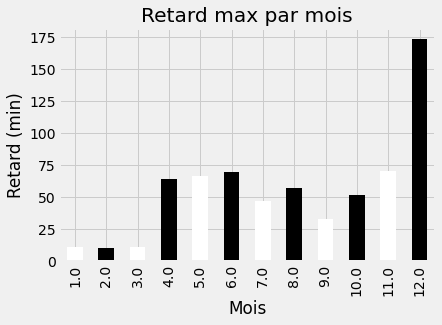

In [209]:
RetardMax_M=regularities_hc.groupby(['Month'])
RetardMax_M.max()["average_delay_all_departing_trains"].plot.bar(title='Retard max par mois', 
                                                                 color=['white','black'],
                                                                 xlabel='Mois', 
                                                                 ylabel='Retard (min)')

**Comparaison grands retards vs petits retards**

<AxesSubplot:title={'center':'Comparaison grand et petit retard'}, xlabel='Mois', ylabel='Nombre de trains'>

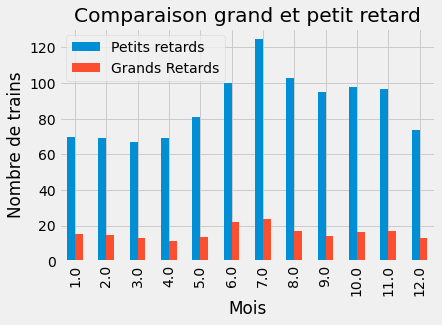

In [136]:
Petits=RetardMax_M["number_late_trains_departure"].mean()+RetardMax_M["number_late_trains_15min"].mean()
Grands=RetardMax_M["number_late_trains_30min"].mean()+RetardMax_M["number_late_trains_60min"].mean()
retards=pd.DataFrame({"Petits retards":Petits,"Grands Retards":Grands})
retards.plot.bar(title='Comparaison grand et petit retard' ,xlabel='Mois', ylabel='Nombre de trains')

**Retards max par mois et par année**

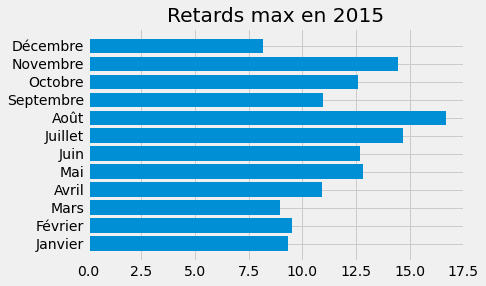

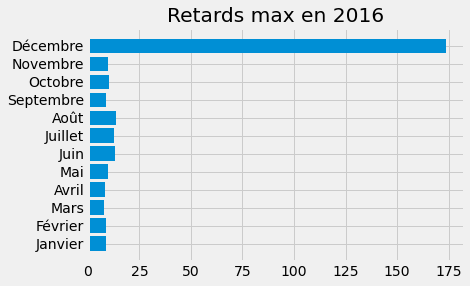

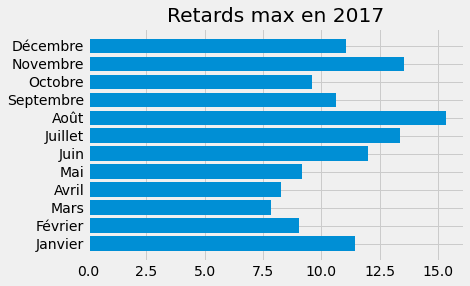

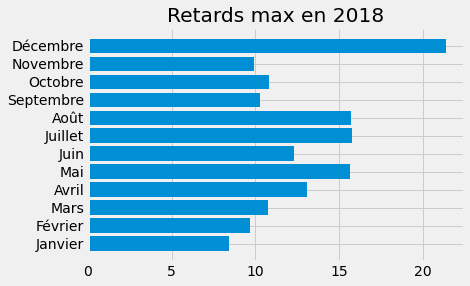

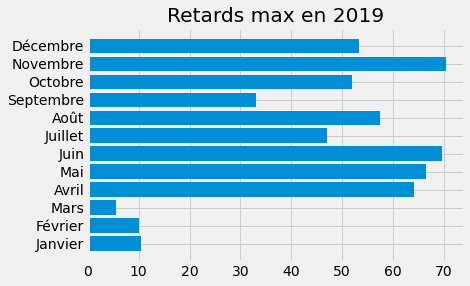

In [165]:
RetardMax_MA=regularities_hc.groupby(['Year','Month']).max()
Mois=["Janvier","Février","Mars",'Avril',"Mai","Juin","Juillet","Août","Septembre","Octobre","Novembre","Décembre"]
RM_2015=[]
RM_2016=[]
RM_2017=[]
RM_2018=[]
RM_2019=[]
for k in range(1,13):
    RM_2015.append(RetardMax_MA["average_delay_all_departing_trains"][(2015,k)])
    RM_2016.append(RetardMax_MA["average_delay_all_departing_trains"][(2016,k)])
    RM_2017.append(RetardMax_MA["average_delay_all_departing_trains"][(2017,k)])
    RM_2018.append(RetardMax_MA["average_delay_all_departing_trains"][(2018,k)])
    RM_2019.append(RetardMax_MA["average_delay_all_departing_trains"][(2019,k)])
plt.figure()
plt.barh(Mois,RM_2015)
plt.title("Retards max en 2015")
plt.figure()
plt.barh(Mois,RM_2016)
plt.title("Retards max en 2016")
plt.figure()
plt.barh(Mois,RM_2017)
plt.title("Retards max en 2017")
plt.figure()
plt.barh(Mois,RM_2018)
plt.title("Retards max en 2018")
plt.figure()
plt.barh(Mois,RM_2019)
plt.title("Retards max en 2019")
plt.show()


**Raisons principales des retards**

<AxesSubplot:title={'center':'Causes principales des retards'}, ylabel='Retard moyen'>

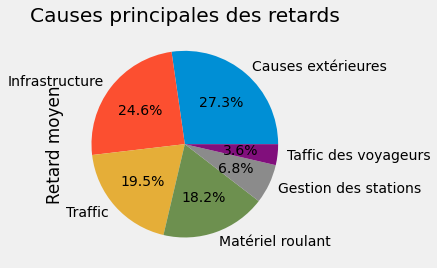

In [253]:
def percentage(val):
    return str(round(val,1)) + "%"

data = []
data.append(regularities_hc['delay_external_causes'].mean())
data.append(regularities_hc['delay_railway_infrastructure'].mean())
data.append(regularities_hc['delay_traffic_management'].mean())
data.append(regularities_hc['delay_rolling_stock'].mean())
data.append(regularities_hc['delay_station_management'].mean())
data.append(regularities_hc['delay_passenger_traffic'].mean())

index = ['Causes extérieures', 'Infrastructure', 'Traffic', 'Matériel roulant', 'Gestion des stations', 'Taffic des voyageurs']

delay = pd.DataFrame(data, index=index, columns=['average_delay'])

delay['average_delay'].plot.pie(title='Causes principales des retards', ylabel='Retard moyen', autopct=percentage)

**Retard en fonction de la durée du trajet**

<AxesSubplot:title={'center':'Retard moyen en fonction de la durée du trajet'}, xlabel='Durée du trajet (min)', ylabel='Retard (min)'>

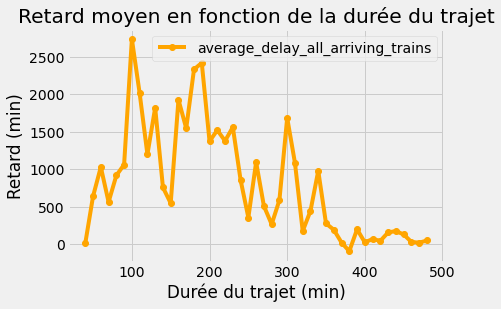

In [126]:
delay = regularities_hc.pivot_table(index="average_travel_time",
                                    values=["average_delay_all_arriving_trains"],
                                    aggfunc="sum")

delay.plot(title='Retard moyen en fonction de la durée du trajet', 
           color='orange', 
           style='-o', 
           xlabel='Durée du trajet (min)', 
           ylabel='Retard (min)')

**Retard au départ vs retard à l'arrivée**

<AxesSubplot:title={'center':"Comparaison du nombre de retard au départ et à l'arrivée"}, ylabel='Nombre de train'>

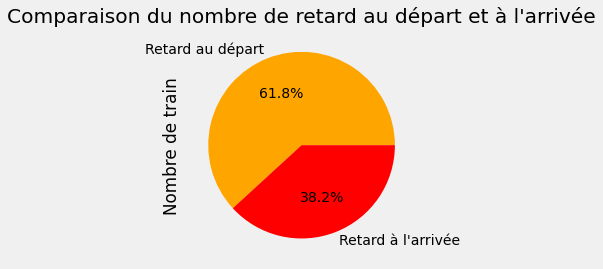

In [249]:
data = []
data.append(regularities_hc['number_late_trains_departure'].sum())
data.append(regularities_hc['number_late_trains_arrival'].sum())
late_train = pd.DataFrame(data, index=['Retard au départ', "Retard à l'arrivée"], columns=['Nombre de train'])

late_train['Nombre de train'].plot.pie(title="Comparaison du nombre de retard au départ et à l'arrivée", autopct=percentage, colors=['orange','red'])

## **2- COVID**

***Nous avons créer une nouvelle dataframe hors COVID : regularities_hc2.
Cette dernière prent uniquement les mois de février à juin pour faire la comparaison avec la dataframe COVID***

In [230]:
L=[]
for k in range(regularities_hc.shape[0]):
    if(regularities.iloc[k].Month>=2 and regularities.iloc[k].Month<=6 and regularities.iloc[k].Year!=2020):
        L.append(k)
LFinale=[]
for k in range(len(L)):
    LFinale.append(regularities.iloc[L[k]])
regularities_hc2=pd.DataFrame(LFinale)

**Impact du COVID sur la circulation**

<AxesSubplot:title={'center':'Comparaison de la circulation avant et durant le COVID'}, xlabel='Mois', ylabel='Nombre de train'>

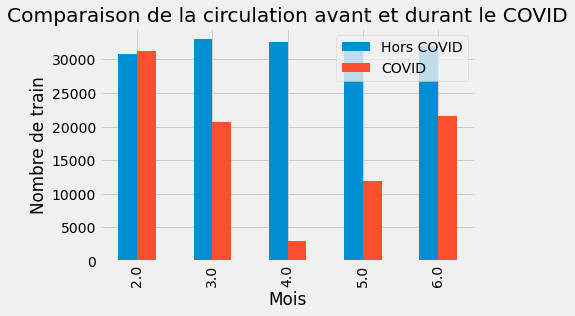

In [162]:
circulation_hc = regularities_hc2.groupby('Month')['expected_circulation'].sum()/5
circulation_c = regularities_c.groupby('Month')['expected_circulation'].sum()
circulation = pd.DataFrame({"Hors COVID": circulation_hc,"COVID": circulation_c})
circulation.plot.bar(title='Comparaison de la circulation avant et durant le COVID',
                     xlabel='Mois',
                     ylabel='Nombre de train')

**Impact du COVID sur le nombre de retard**

<AxesSubplot:title={'center':'Moyenne du nombre de retard par mois'}, xlabel='Mois', ylabel='Nombre de train'>

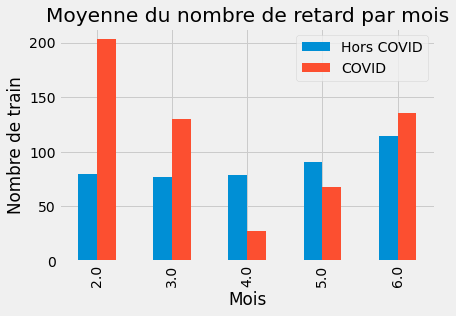

In [240]:
nb_retard_hc = regularities_hc2.groupby('Month')["number_late_trains"].mean()
nb_retard_c = regularities_c.groupby('Month')["number_late_trains"].mean()
nb_retard = pd.DataFrame({'Hors COVID':nb_retard_hc,'COVID':nb_retard_c})
nb_retard.plot.bar(title='Moyenne du nombre de retard par mois', xlabel='Mois', ylabel='Nombre de train')

**Impact du COVID sur la durée des retards**

<AxesSubplot:title={'center':'Retard moyen par mois'}, xlabel='Mois', ylabel='Retard (min)'>

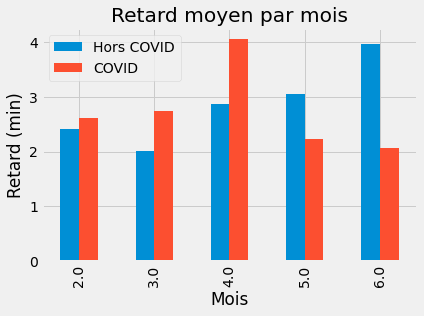

In [212]:
retard_moy_hc = regularities_hc2.groupby('Month')["average_delay_all_departing_trains"].mean()
retard_moy_c = regularities_c.groupby('Month')["average_delay_all_departing_trains"].mean()
retard_moy = pd.DataFrame({'Hors COVID':retard_moy_hc,'COVID':retard_moy_c})
retard_moy.plot.bar(title='Retard moyen par mois', xlabel='Mois', ylabel='Retard (min)')

**Impact du COVID sur le nombre de train annulés**

<AxesSubplot:title={'center':'Nombre de trains annulés par mois'}, xlabel='Mois', ylabel='Nombre de train'>

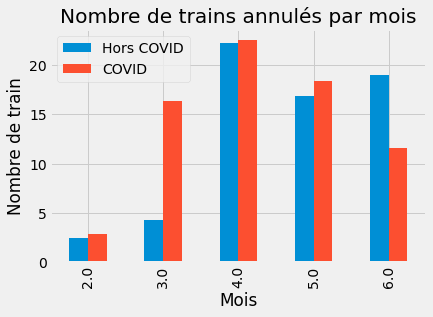

In [218]:
cancelled_hc = regularities_hc2.groupby('Month')["number_cancelled_trains"].mean()
cancelled_c = regularities_c.groupby('Month')["number_cancelled_trains"].mean()
cancelled = pd.DataFrame({'Hors COVID':cancelled_hc,'COVID':cancelled_c})
cancelled.plot.bar(title='Nombre de trains annulés par mois', xlabel='Mois', ylabel='Nombre de train')

**Comparaison des causes des retards pendant COVID**

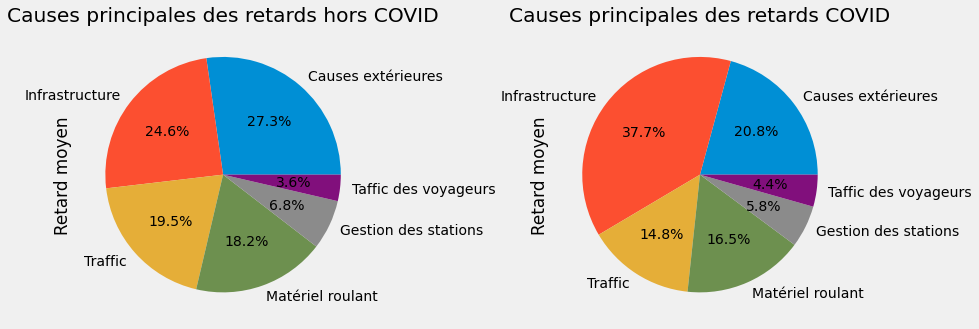

In [262]:
data = []
data.append(regularities_c['delay_external_causes'].mean())
data.append(regularities_c['delay_railway_infrastructure'].mean())
data.append(regularities_c['delay_traffic_management'].mean())
data.append(regularities_c['delay_rolling_stock'].mean())
data.append(regularities_c['delay_station_management'].mean())
data.append(regularities_c['delay_passenger_traffic'].mean())

index = ['Causes extérieures', 'Infrastructure', 'Traffic', 'Matériel roulant', 'Gestion des stations', 'Taffic des voyageurs']

delay2 = pd.DataFrame(data, index=index, columns=['average_delay'])


fig = plt.figure(figsize=(25,15))
ax1 = plt.subplot2grid((2,4),(0,0))
delay['average_delay'].plot.pie(title='Causes principales des retards hors COVID', ylabel='Retard moyen', autopct=percentage)

ax1 = plt.subplot2grid((2,4),(0,1))
delay2['average_delay'].plot.pie(title='Causes principales des retards COVID', ylabel='Retard moyen', autopct=percentage)
plt.tight_layout()

## **3-Période de grève**

***Nous avons recherché les différentes dates des grèves survenues entre 2015 et 2019 que l'on a inséré dans la liste DateTS. (Source : https://www.cestlagreve.fr/calendrier/?secteur=16&mois=7&annee=2015)***

In [207]:
DateTS=[(2019,12),(2019,11),(2019,6),(2019,1),(2018,12),(2018,7),(2018,5),(2018,4),(2018,1),(2017,12),(2017,4),(2016,12),(2016,6),(2016,5),(2016,1),(2015,12),(2015,11),(2015,8)]

**Retards max par année (comparaison période de grèves / hors grèves)**

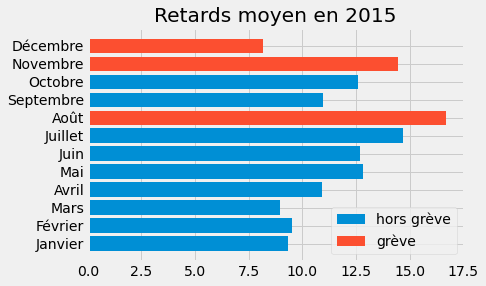

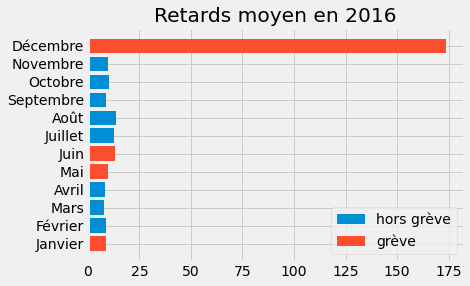

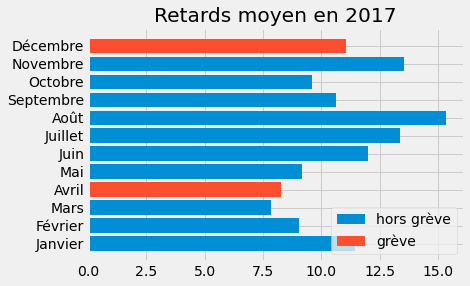

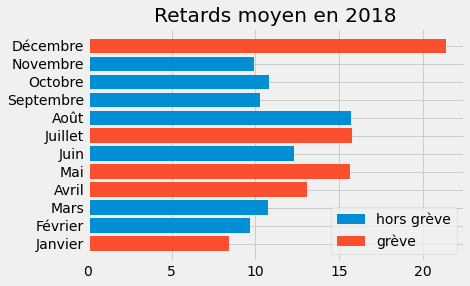

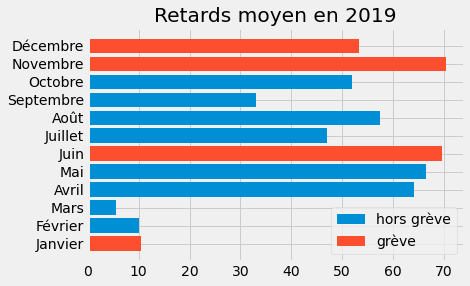

In [270]:
RM_2015=[]
RM_2016=[]
RM_2017=[]
RM_2018=[]
RM_2019=[]
RM_2015_TS=[]
RM_2016_TS=[]
RM_2017_TS=[]
RM_2018_TS=[]
RM_2019_TS=[]
for k in range(1,13):
    if(k==8 or k==11 or k==12):
        RM_2015_TS.append(RetardMax_MA["average_delay_all_departing_trains"][(2015,k)])
        RM_2015.append(0)
    else:
        RM_2015.append(RetardMax_MA["average_delay_all_departing_trains"][(2015,k)])
        RM_2015_TS.append(0)
for k in range(1,13):
    if(k==1 or k==5 or k==6 or k==12):
        RM_2016_TS.append(RetardMax_MA["average_delay_all_departing_trains"][(2016,k)])
        RM_2016.append(0)
    else:
        RM_2016.append(RetardMax_MA["average_delay_all_departing_trains"][(2016,k)])
        RM_2016_TS.append(0)
for k in range(1,13):
    if(k==4 or k==12):
        RM_2017_TS.append(RetardMax_MA["average_delay_all_departing_trains"][(2017,k)])
        RM_2017.append(0)
    else:
        RM_2017.append(RetardMax_MA["average_delay_all_departing_trains"][(2017,k)])
        RM_2017_TS.append(0)
for k in range(1,13):
    if(k==1 or k==4 or k==5 or k==7 or k==12):
        RM_2018_TS.append(RetardMax_MA["average_delay_all_departing_trains"][(2018,k)])
        RM_2018.append(0)
    else:
        RM_2018.append(RetardMax_MA["average_delay_all_departing_trains"][(2018,k)])
        RM_2018_TS.append(0)
for k in range(1,13):
    if(k==1 or k==6 or k==11 or k==12):
        RM_2019_TS.append(RetardMax_MA["average_delay_all_departing_trains"][(2019,k)])
        RM_2019.append(0)
    else:
        RM_2019.append(RetardMax_MA["average_delay_all_departing_trains"][(2019,k)])
        RM_2019_TS.append(0)
plt.figure()
plt.barh(Mois,RM_2015)
plt.barh(Mois,RM_2015_TS)
plt.title("Retards moyen en 2015")
plt.legend(["hors grève","grève"])
plt.figure()
plt.barh(Mois,RM_2016)
plt.barh(Mois,RM_2016_TS)
plt.title("Retards moyen en 2016")
plt.legend(["hors grève","grève"])
plt.figure()
plt.barh(Mois,RM_2017)
plt.barh(Mois,RM_2017_TS)
plt.title("Retards moyen en 2017")
plt.legend(["hors grève","grève"])
plt.figure()
plt.barh(Mois,RM_2018)
plt.barh(Mois,RM_2018_TS)
plt.title("Retards moyen en 2018")
plt.legend(["hors grève","grève"])
plt.figure()
plt.barh(Mois,RM_2019)
plt.barh(Mois,RM_2019_TS)
plt.title("Retards moyen en 2019")
plt.legend(["hors grève","grève"])
plt.show()

**Nombre de trains supprimés**

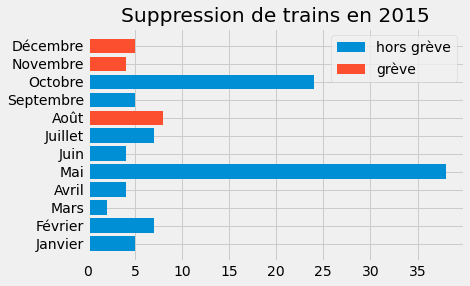

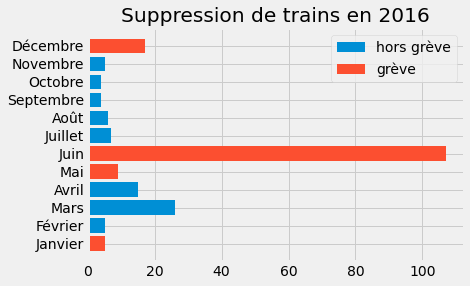

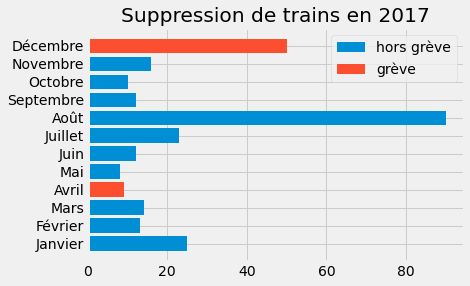

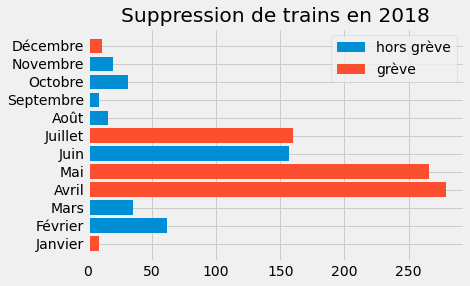

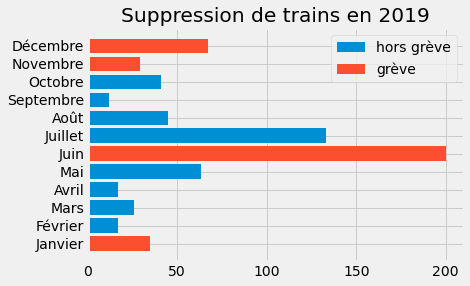

In [268]:
RM_2015=[]
RM_2016=[]
RM_2017=[]
RM_2018=[]
RM_2019=[]
RM_2015_TS=[]
RM_2016_TS=[]
RM_2017_TS=[]
RM_2018_TS=[]
RM_2019_TS=[]
for k in range(1,13):
    if(k==8 or k==11 or k==12):
        RM_2015_TS.append(RetardMax_MA["number_cancelled_trains"][(2015,k)])
        RM_2015.append(0)
    else:
        RM_2015.append(RetardMax_MA["number_cancelled_trains"][(2015,k)])
        RM_2015_TS.append(0)
for k in range(1,13):
    if(k==1 or k==5 or k==6 or k==12):
        RM_2016_TS.append(RetardMax_MA["number_cancelled_trains"][(2016,k)])
        RM_2016.append(0)
    else:
        RM_2016.append(RetardMax_MA["number_cancelled_trains"][(2016,k)])
        RM_2016_TS.append(0)
for k in range(1,13):
    if(k==4 or k==12):
        RM_2017_TS.append(RetardMax_MA["number_cancelled_trains"][(2017,k)])
        RM_2017.append(0)
    else:
        RM_2017.append(RetardMax_MA["number_cancelled_trains"][(2017,k)])
        RM_2017_TS.append(0)
for k in range(1,13):
    if(k==1 or k==4 or k==5 or k==7 or k==12):
        RM_2018_TS.append(RetardMax_MA["number_cancelled_trains"][(2018,k)])
        RM_2018.append(0)
    else:
        RM_2018.append(RetardMax_MA["number_cancelled_trains"][(2018,k)])
        RM_2018_TS.append(0)
for k in range(1,13):
    if(k==1 or k==6 or k==11 or k==12):
        RM_2019_TS.append(RetardMax_MA["number_cancelled_trains"][(2019,k)])
        RM_2019.append(0)
    else:
        RM_2019.append(RetardMax_MA["number_cancelled_trains"][(2019,k)])
        RM_2019_TS.append(0)
plt.figure()
plt.barh(Mois,RM_2015)
plt.barh(Mois,RM_2015_TS)
plt.title("Suppression de trains en 2015")
plt.legend(["hors grève","grève"])
plt.figure()
plt.barh(Mois,RM_2016)
plt.barh(Mois,RM_2016_TS)
plt.title("Suppression de trains en 2016")
plt.legend(["hors grève","grève"])
plt.figure()
plt.barh(Mois,RM_2017)
plt.barh(Mois,RM_2017_TS)
plt.title("Suppression de trains en 2017")
plt.legend(["hors grève","grève"])
plt.figure()
plt.barh(Mois,RM_2018)
plt.barh(Mois,RM_2018_TS)
plt.title("Suppression de trains en 2018")
plt.legend(["hors grève","grève"])
plt.figure()
plt.barh(Mois,RM_2019)
plt.barh(Mois,RM_2019_TS)
plt.title("Suppression de trains en 2019")
plt.legend(["hors grève","grève"])
plt.show()

**Durée moyen des trajets**

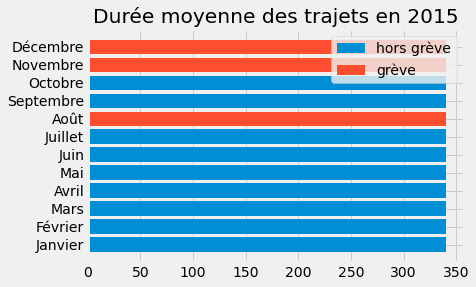

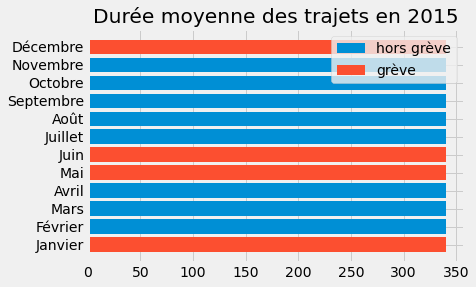

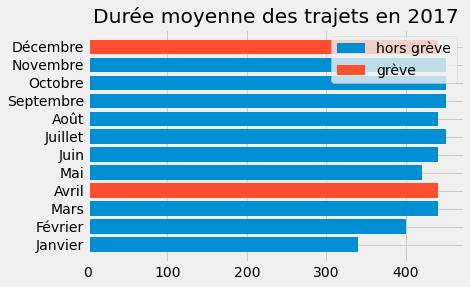

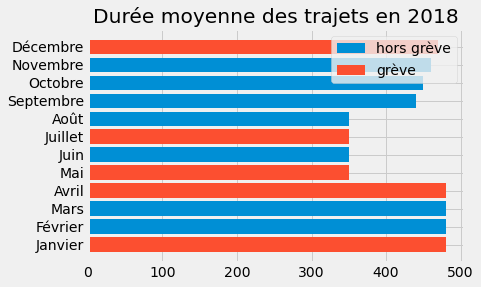

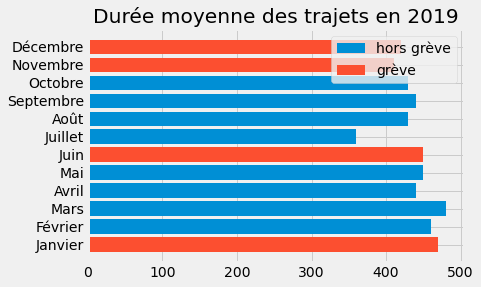

In [267]:
RM_2015=[]
RM_2016=[]
RM_2017=[]
RM_2018=[]
RM_2019=[]
RM_2015_TS=[]
RM_2016_TS=[]
RM_2017_TS=[]
RM_2018_TS=[]
RM_2019_TS=[]
for k in range(1,13):
    if(k==8 or k==11 or k==12):
        RM_2015_TS.append(RetardMax_MA["average_travel_time"][(2015,k)])
        RM_2015.append(0)
    else:
        RM_2015.append(RetardMax_MA["average_travel_time"][(2015,k)])
        RM_2015_TS.append(0)
for k in range(1,13):
    if(k==1 or k==5 or k==6 or k==12):
        RM_2016_TS.append(RetardMax_MA["average_travel_time"][(2016,k)])
        RM_2016.append(0)
    else:
        RM_2016.append(RetardMax_MA["average_travel_time"][(2016,k)])
        RM_2016_TS.append(0)
for k in range(1,13):
    if(k==4 or k==12):
        RM_2017_TS.append(RetardMax_MA["average_travel_time"][(2017,k)])
        RM_2017.append(0)
    else:
        RM_2017.append(RetardMax_MA["average_travel_time"][(2017,k)])
        RM_2017_TS.append(0)
for k in range(1,13):
    if(k==1 or k==4 or k==5 or k==7 or k==12):
        RM_2018_TS.append(RetardMax_MA["average_travel_time"][(2018,k)])
        RM_2018.append(0)
    else:
        RM_2018.append(RetardMax_MA["average_travel_time"][(2018,k)])
        RM_2018_TS.append(0)
for k in range(1,13):
    if(k==1 or k==6 or k==11 or k==12):
        RM_2019_TS.append(RetardMax_MA["average_travel_time"][(2019,k)])
        RM_2019.append(0)
    else:
        RM_2019.append(RetardMax_MA["average_travel_time"][(2019,k)])
        RM_2019_TS.append(0)
plt.figure()
plt.barh(Mois,RM_2015)
plt.barh(Mois,RM_2015_TS)
plt.title("Durée moyenne des trajets en 2015")
plt.legend(["hors grève","grève"])
plt.figure()
plt.barh(Mois,RM_2016)
plt.barh(Mois,RM_2016_TS)
plt.title("Durée moyenne des trajets en 2015")
plt.legend(["hors grève","grève"])
plt.figure()
plt.barh(Mois,RM_2017)
plt.barh(Mois,RM_2017_TS)
plt.title("Durée moyenne des trajets en 2017")
plt.legend(["hors grève","grève"])
plt.figure()
plt.barh(Mois,RM_2018)
plt.barh(Mois,RM_2018_TS)
plt.title("Durée moyenne des trajets en 2018")
plt.legend(["hors grève","grève"])
plt.figure()
plt.barh(Mois,RM_2019)
plt.barh(Mois,RM_2019_TS)
plt.title("Durée moyenne des trajets en 2019")
plt.legend(["hors grève","grève"])
plt.show()

**Retard dû au nombre de voyageurs**

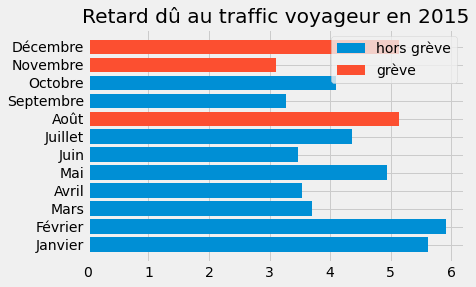

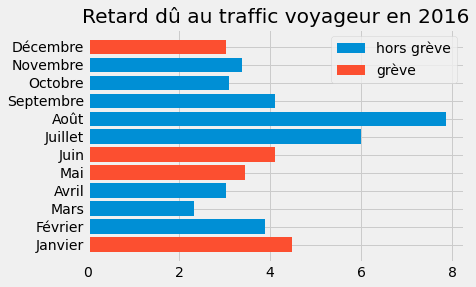

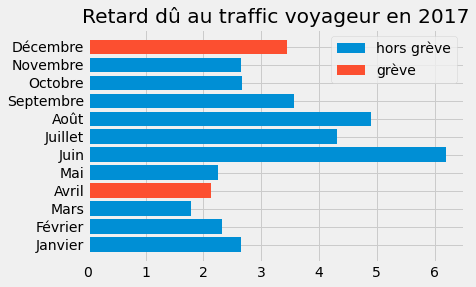

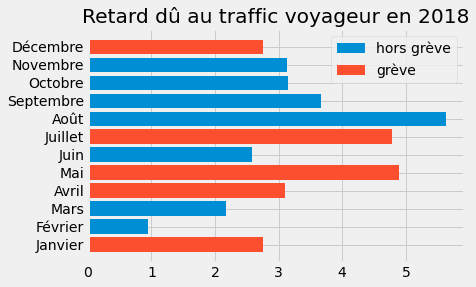

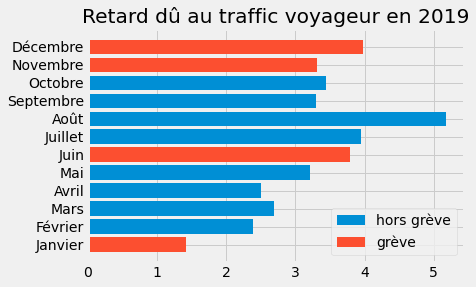

In [269]:
RetardMax_TS=regularities_hc.groupby(['Year','Month']).mean()
RM_2015=[]
RM_2016=[]
RM_2017=[]
RM_2018=[]
RM_2019=[]
RM_2015_TS=[]
RM_2016_TS=[]
RM_2017_TS=[]
RM_2018_TS=[]
RM_2019_TS=[]
for k in range(1,13):
    if(k==8 or k==11 or k==12):
        RM_2015_TS.append(RetardMax_TS["delay_passenger_traffic"][(2015,k)])
        RM_2015.append(0)
    else:
        RM_2015.append(RetardMax_TS["delay_passenger_traffic"][(2015,k)])
        RM_2015_TS.append(0)
for k in range(1,13):
    if(k==1 or k==5 or k==6 or k==12):
        RM_2016_TS.append(RetardMax_TS["delay_passenger_traffic"][(2016,k)])
        RM_2016.append(0)
    else:
        RM_2016.append(RetardMax_TS["delay_passenger_traffic"][(2016,k)])
        RM_2016_TS.append(0)
for k in range(1,13):
    if(k==4 or k==12):
        RM_2017_TS.append(RetardMax_TS["delay_passenger_traffic"][(2017,k)])
        RM_2017.append(0)
    else:
        RM_2017.append(RetardMax_TS["delay_passenger_traffic"][(2017,k)])
        RM_2017_TS.append(0)
for k in range(1,13):
    if(k==1 or k==4 or k==5 or k==7 or k==12):
        RM_2018_TS.append(RetardMax_TS["delay_passenger_traffic"][(2018,k)])
        RM_2018.append(0)
    else:
        RM_2018.append(RetardMax_TS["delay_passenger_traffic"][(2018,k)])
        RM_2018_TS.append(0)
for k in range(1,13):
    if(k==1 or k==6 or k==11 or k==12):
        RM_2019_TS.append(RetardMax_TS["delay_passenger_traffic"][(2019,k)])
        RM_2019.append(0)
    else:
        RM_2019.append(RetardMax_TS["delay_passenger_traffic"][(2019,k)])
        RM_2019_TS.append(0)
plt.figure()
plt.barh(Mois,RM_2015)
plt.barh(Mois,RM_2015_TS)
plt.title("Retard dû au traffic voyageur en 2015")
plt.legend(["hors grève","grève"])
plt.figure()
plt.barh(Mois,RM_2016)
plt.barh(Mois,RM_2016_TS)
plt.title("Retard dû au traffic voyageur en 2016")
plt.legend(["hors grève","grève"])
plt.figure()
plt.barh(Mois,RM_2017)
plt.barh(Mois,RM_2017_TS)
plt.title("Retard dû au traffic voyageur en 2017")
plt.legend(["hors grève","grève"])
plt.figure()
plt.barh(Mois,RM_2018)
plt.barh(Mois,RM_2018_TS)
plt.title("Retard dû au traffic voyageur en 2018")
plt.legend(["hors grève","grève"])
plt.figure()
plt.barh(Mois,RM_2019)
plt.barh(Mois,RM_2019_TS)
plt.title("Retard dû au traffic voyageur en 2019")
plt.legend(["hors grève","grève"])
plt.show()